In [1]:
import pandas as pd 
import ast
from matplotlib import pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

<AxesSubplot:>

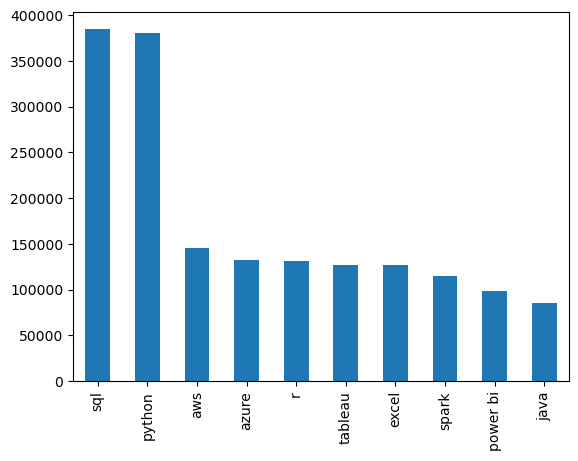

In [6]:
df_exploded = df.explode('job_skills')
df_exploded
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [9]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [12]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


<AxesSubplot:ylabel='job_skills'>

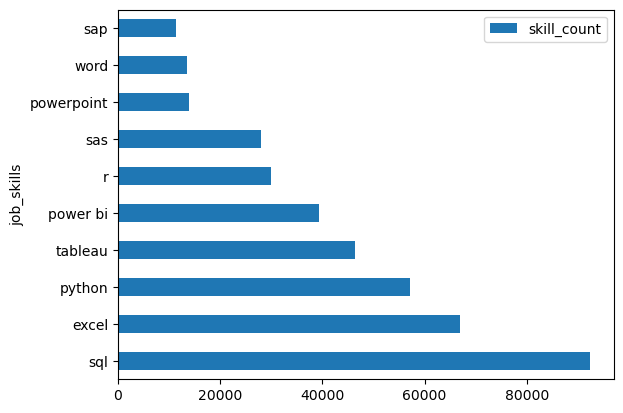

In [14]:
job_title ='Data Analyst'
top_skills= 10

df_skill_final = df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skills)
df_skill_final.plot(kind='barh', x = 'job_skills', y= 'skill_count')